In [3]:
# Loading the data
import pandas as pd
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
X = df.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)
y = df.loc[:, "diagnosis"]

In [4]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
X.iloc[:, :] = rob_scaler.fit_transform(X.iloc[:, :])

In [5]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [6]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

Text(0, 0.5, '2nd Principal Component')

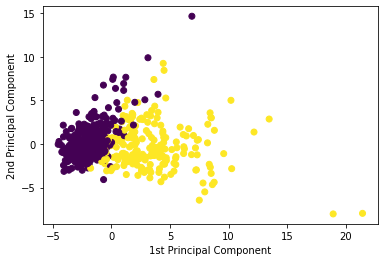

In [7]:
# Visualizing the data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

In [8]:
# SVM with Stratified K Fold Cross Validation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = SVC()

In [9]:
# Model Evaluation
accuracies = []

for train_index, val_index in skf.split(X, y): 
    X_train, X_test = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_test = y[train_index], y[val_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_pred, y_test))

print("Overall Accuracy = %.3f%%" % (sum(accuracies)/len(accuracies)*100))

Overall Accuracy = 97.359%
